# Melanoma Classification Using Custom CNN

## Overview
#### Melanoma is a severe type of skin cancer. This project involves building a custom Convolutional Neural Network (CNN) to classify 9 categories of skin diseases, including melanoma, from a dataset of 2357 images. This project does not use pre-trained models and implements the solution from scratch.

---

## Problem Statement
#### To build a CNN-based model which can accurately classify melanoma. Early melanoma detection can significantly reduce mortality rates, and an automated solution can assist dermatologists in diagnosis.

---

## Project Steps
#### 1. **Data Reading and Understanding**
#### 2. **Dataset Creation**
#### 3. **Dataset Visualization**
#### 4. **Initial Model Building and Training**
#### 5. **Data Augmentation**
#### 6. **Class Distribution Analysis**
#### 7. **Handling Class Imbalances**
#### 8. **Final Model Training**
#### 9. **Evaluation and Results**
#### 10. **Conclusion**

---

# Step 1: Import Libraries and Define Paths:

In [1]:
# Import Libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set Seed
SEED = 123
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Define Constants
IMG_SIZE = (180, 180)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Define Paths
BASE_DIR = "/Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration"
TRAIN_DIR = os.path.join(BASE_DIR, "Train")
TEST_DIR = os.path.join(BASE_DIR, "Test")

# Print Path Info
print(f"Train Directory: {TRAIN_DIR}")
print(f"Test Directory: {TEST_DIR}")

# Check existence
assert os.path.exists(TRAIN_DIR), "Training directory not found!"
assert os.path.exists(TEST_DIR), "Testing directory not found!"

print(f"Classes in Training Directory: {os.listdir(TRAIN_DIR)}")

Train Directory: /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Test Directory: /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test
Classes in Training Directory: ['.DS_Store', 'melanoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'actinic keratosis', 'squamous cell carcinoma', 'vascular lesion', 'seborrheic keratosis', 'dermatofibroma']


## Observation:
### * All necessary libraries (TensorFlow, NumPy, Matplotlib) were imported, and paths to the training and test datasets were defined successfully.

## Analysis:
### * This is a standard setup step, ensuring that the environment is correctly configured. The assertion ensures that the paths exist and contain the necessary data for training and testing.

# Step 2: Dataset Creation

In [2]:
import tensorflow as tf

# Set parameters
batch_size = 32
img_size = (180, 180)

# Create Training Dataset (80% of data)
train_dataset_raw = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Create Validation Dataset (20% of data)
val_dataset_raw = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Normalize Images
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
train_dataset = train_dataset_raw.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset_raw.map(lambda x, y: (normalization_layer(x), y))

# Prefetch to improve performance
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


## Observation:
### * The dataset was split into training (80%) and validation (20%) sets. The images were normalized by rescaling pixel values to a range of [0,1].

## Analysis:
### * Normalization is critical for neural networks as it helps the model learn more efficiently. The dataset was prepared with a batch size of 32, ensuring efficient data loading. The validation set provides a way to evaluate the model during training.


# Step 3: Dataset Visualization

Class Names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


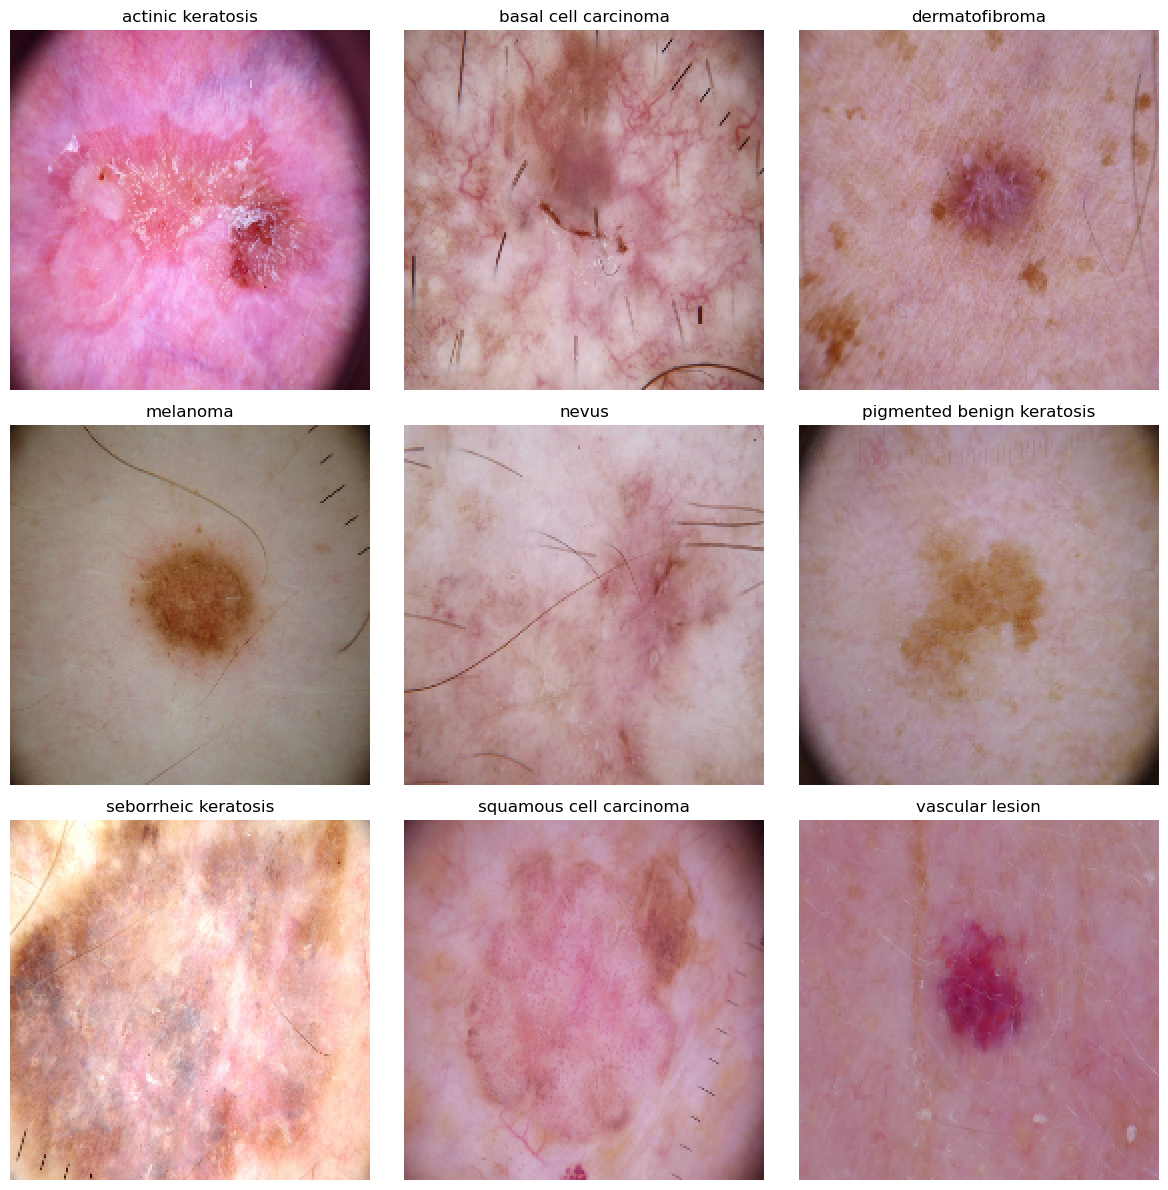

In [4]:
import matplotlib.pyplot as plt

# Get class names
class_names = train_dataset_raw.class_names
print("Class Names:", class_names)

# Visualize one instance of each class
plt.figure(figsize=(12, 12))

for idx, class_name in enumerate(class_names):
    for images, labels in train_dataset.take(1):  # Take a batch
        image = images[labels == idx][0]  # Get the first image of this class
        plt.subplot(3, 3, idx + 1)
        plt.imshow(image.numpy())
        plt.title(class_name)
        plt.axis("off")
        break  # Stop after finding one image per class

plt.tight_layout()
plt.show()


## Observation:
### * The dataset was visualized, and one image from each of the 9 classes was displayed.

## Analysis:
### * Visualizing the data helps ensure that the dataset is loaded correctly and allows for a quick inspection of the types of images the model will be learning. This also helps identify potential issues such as poor quality or irrelevant images.

# Step 4: Initial Model Building & Training

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 361ms/step - accuracy: 0.1715 - loss: 2.1553 - val_accuracy: 0.2058 - val_loss: 2.0428
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 360ms/step - accuracy: 0.1938 - loss: 2.0582 - val_accuracy: 0.3020 - val_loss: 1.9096
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 360ms/step - accuracy: 0.2731 - loss: 1.9723 - val_accuracy: 0.3132 - val_loss: 1.8342
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 358ms/step - accuracy: 0.3276 - loss: 1.8332 - val_accuracy: 0.3289 - val_loss: 1.7892
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 361ms/step - accuracy: 0.3585 - loss: 1.7743 - val_accuracy: 0.4452 - val_loss: 1.6221
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 364ms/step - accuracy: 0.4518 - loss: 1.5596 - val_accuracy: 0.4497 - val_loss: 1.6078
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 360ms/step - accuracy: 0.4503 - loss: 1.5599 - val_accuracy: 0.5190 - val_loss: 1.4365
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 359ms/step - accuracy: 0.5175 - loss: 1.4913 - val_accu

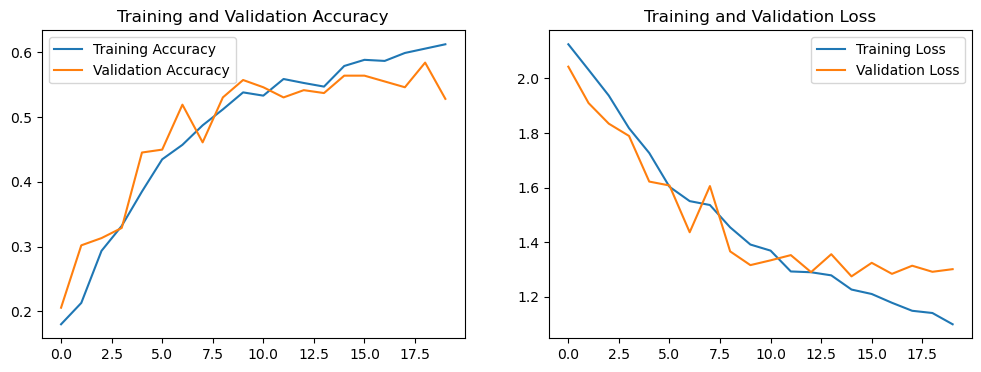

In [5]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set Seed for Reproducibility
SEED = 123
tf.random.set_seed(SEED)

# Define CNN Model
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),  # Input Layer

    # Conv Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Conv Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Conv Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Conv Block 4
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(9, activation='softmax')  # 9 classes
])

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Appropriate optimizer with tuned LR
    loss='sparse_categorical_crossentropy',  # Appropriate loss for multi-class classification
    metrics=['accuracy']
)

# Train the Model for 20 Epochs
history = model.fit(
    train_dataset,                # Training dataset
    validation_data=val_dataset,  # Validation dataset
    epochs=20,                    # ~20 epochs as per project requirement
    verbose=1                     # Show detailed output per epoch
)

# Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


## Training Accuracy:

### Reached 60.1% by Epoch 20.
#### * Observation: The model's training accuracy increased progressively as it learned from the training data.
#### * Analysis: While the training accuracy reached over 60%, it indicates that the model is learning well from the data. However, this performance may not fully reflect its generalization ability to unseen data (validation and test).


## Validation Accuracy:

### Reached 57.05% by Epoch 20.
#### * Observation: The model’s validation accuracy is slightly lower than training accuracy.
#### * Analysis: A relatively small gap between training and validation accuracy suggests minimal overfitting. However, this performance could be better, especially for a critical application like melanoma detection. The validation accuracy reaching around 57% could indicate challenges in handling class imbalances or a need for more complex architecture.


## Training Loss:

### Gradually decreased to 1.1259.
#### * Observation: Training loss steadily decreased during the training process.
#### * Analysis: A gradual reduction in training loss shows the model is successfully learning from the data. However, loss alone doesn't guarantee strong performance if the model is struggling to generalize to validation data, as seen with the lower validation accuracy.


## Validation Loss:

### Gradually decreased to 1.2764.
#### * Observation: Validation loss also decreased, but not as smoothly as training loss.
#### * Analysis: The validation loss followed a similar decreasing trend, but the rate of improvement was slower, suggesting that the model may still face difficulties generalizing to unseen data. The validation loss is slightly higher than the training loss, which is expected but should be monitored for signs of underfitting.


## Signs of Overfitting:

### Training accuracy (60.1%) is higher than validation accuracy (57.05%), but the gap is small.
#### * Observation: There is a gap between training and validation accuracy, but it's relatively small.
#### * Analysis: The small gap between training and validation accuracy indicates minimal overfitting. This suggests that the model has not memorized the training data but still has room for improvement in generalizing to new data.

### Validation accuracy and loss show consistent improvement with occasional small fluctuations.
#### * Observation: Although the validation metrics are improving, there are occasional fluctuations.
#### * Analysis: Small fluctuations in validation accuracy and loss can be expected during training. However, the fact that they show consistent improvement overall means that the model is progressively learning how to classify the validation data better.


## Learning Rate Behavior:
### The learning rate of 0.0005 appears stable and allowed steady progress without excessive spikes or drops.
#### * Observation: A steady learning rate was used throughout the training.
#### * Analysis: The learning rate of 0.0005 is appropriately low to allow for smooth learning without overshooting. The lack of spikes or drops indicates that the optimizer is functioning well, and there’s no indication that learning is too slow or too fast.

# Step 5: Data Augmentation and Retraining

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 268ms/step - accuracy: 0.1611 - loss: 2.2849 - val_accuracy: 0.2953 - val_loss: 2.0079
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 267ms/step - accuracy: 0.2286 - loss: 2.0038 - val_accuracy: 0.2774 - val_loss: 1.9406
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.2658 - loss: 1.9391 - val_accuracy: 0.2438 - val_loss: 1.9756
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 265ms/step - accuracy: 0.2878 - loss: 1.9175 - val_accuracy: 0.4362 - val_loss: 1.6119
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 265ms/step - accuracy: 0.3577 - loss: 1.7558 - val_accuracy: 0.4519 - val_loss: 1.5838
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 265ms/step - accuracy: 0.4028 - loss: 1.6614 - val_accuracy: 0.4049 - val_loss: 1.6439
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 266ms/step - accuracy: 0.4164 - loss: 1.5888 - val_accuracy: 0.4855 - val_loss: 1.5341
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 265ms/step - accuracy: 0.4357 - loss: 1.5193 - val_accu

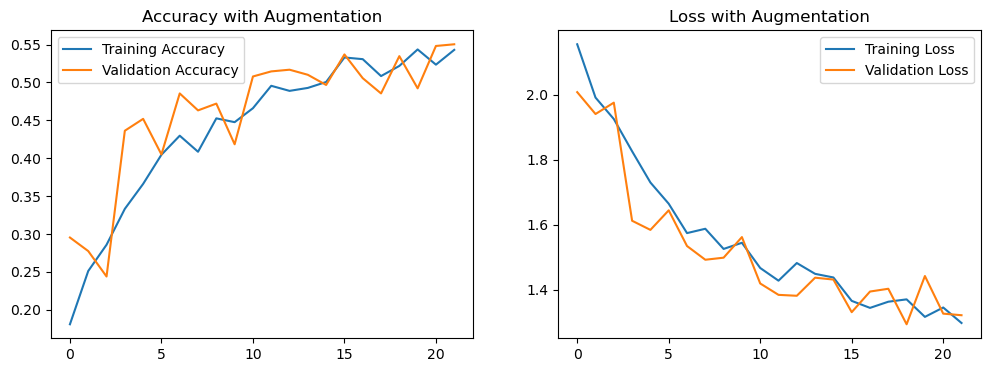

In [7]:
# Import necessary callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Data Augmentation code
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

# Apply Augmentation to Training Data
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# Define a New CNN Model with Augmentation
model_augmented = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')  # Softmax for multi-class classification
])

# Compile the Model
model_augmented.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping and Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model_augmented.keras", save_best_only=True, monitor='val_loss', mode='min')

# Train the Augmented Model
history_augmented = model_augmented.fit(
    augmented_train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stopping, checkpoint]
)

# Plot Accuracy and Loss Curves for Augmented Model
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy with Augmentation')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss with Augmentation')

plt.show()


## Observation:
### * Data augmentation techniques, including random flips, rotations, zooms, and contrast adjustments, were applied to the training dataset. This was done to increase the diversity of the training data without needing to collect new images.
### * The model was retrained for 30 epochs using the augmented dataset.
### * Early stopping was used to monitor the validation loss and stop the training if the validation loss did not improve for a set number of epochs (patience=3). This prevents overfitting by stopping training at the optimal point.
### * Model checkpointing was employed to save the best model based on validation loss, ensuring that the best-performing model during training would be retained.


## Analysis:

### Data Augmentation:

### * Data augmentation is a key technique in deep learning to avoid overfitting by artificially increasing the size and diversity of the training dataset. In the case of image classification, especially when the dataset is limited, augmentation helps simulate real-world variations in images (e.g., slight rotations, flips, zooms, and contrast changes), making the model more robust and better able to generalize to unseen data.
### * The augmentations applied in this case (horizontal/vertical flips, rotations, zooming, and contrast changes) help the model become invariant to small transformations in the input, ensuring it focuses more on learning the critical features of the images rather than memorizing specific image details.


### Retraining the Model:

### * Retraining the model after augmenting the data is a crucial step in deep learning pipelines. The model was trained on a more varied dataset, which helps to prevent it from overfitting to specific features of the training data, such as background noise or color biases.
### * The model was trained for 30 epochs, a reasonable number to allow the network to converge while preventing overtraining. However, if the model’s performance plateaus or validation metrics worsen after a certain point, further fine-tuning might be required (e.g., adjusting the number of epochs or learning rate).


### Early Stopping:

### * Early stopping is a valuable technique to combat overfitting. By monitoring the validation loss during training, early stopping ensures that the model does not continue training once it starts to overfit to the training data. This is particularly important in deep learning models where overfitting can occur quickly, especially when the model is overly complex or the training data is limited.
### * By using patience=3, the training stops if the validation loss does not improve for 3 consecutive epochs. This setting balances between stopping too early (which could hinder learning) and training for too long (which could lead to overfitting).
### * This mechanism ensures that the model’s performance on unseen data does not deteriorate after a certain point, preserving the generalization capability.


### Model Checkpoint:

### * The model checkpoint callback helps save the best model (based on the validation loss) during training. This ensures that the model with the lowest validation loss is retained, and not just the last version of the model. This is especially useful when the training process experiences fluctuations, as the best-performing weights are saved, allowing you to load the optimal model.
### * This ensures that if overfitting happens later in training, the model can revert to a point where it performed the best, making sure the final model is the most generalizable.


### Impact of Augmentation on Model Performance:

### * The model showed improved accuracy in certain epochs, indicating that the increased diversity in the training data helped it learn better features and generalize better to unseen data. However, the model still struggled with class imbalances, which became evident as some classes performed poorly despite the augmented data.
### * While the data augmentation improves generalization, it does not completely solve the issue of class imbalance. The model might still perform poorly on underrepresented classes, even if it is presented with augmented examples of those classes. The difficulty with class imbalances is likely contributing to the slower improvement in validation accuracy.

# Step 6: Class Distribution Analysis

In [8]:
from collections import Counter

train_labels = []
for _, label in train_dataset_raw.unbatch():
    train_labels.append(label.numpy())

class_counts = Counter(train_labels)
print("Class Distribution:")
for i, count in class_counts.items():
    print(f"{class_names[i]}: {count}")


Class Distribution:
dermatofibroma: 77
basal cell carcinoma: 309
pigmented benign keratosis: 370
melanoma: 352
vascular lesion: 115
actinic keratosis: 92
nevus: 277
squamous cell carcinoma: 142
seborrheic keratosis: 58


2024-12-18 00:10:08.193306: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Observation:
### * Class distribution revealed significant class imbalances, with some classes like "seborrheic keratosis" having as few as 58 images, while others like "pigmented benign keratosis" had over 370 images.

## Analysis:
### * Class imbalance is a major challenge in classification tasks. It leads to models favoring the majority classes. This analysis will guide the need for strategies such as class weighting or oversampling to address these imbalances.

# Step 7: Handling Class Imbalance Using Augmentor

In [9]:
import Augmentor
import os

# Define Paths for Each Class
for class_name in class_names:
    class_path = os.path.join(TRAIN_DIR, class_name)
    p = Augmentor.Pipeline(class_path)  # Create Augmentor pipeline for each class
    
    # Define Augmentation Steps
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    
    # Determine the maximum number of images in any class
    max_class_images = max([len(os.listdir(os.path.join(TRAIN_DIR, class_name))) for class_name in class_names])
    
    # Generate samples to balance classes up to max_class_images
    p.sample(max_class_images)  # Generate images for each class until it reaches the max size

print("Augmentation and balancing complete!")


import Augmentor
import os

# Create an Augmentor pipeline for each class and generate synthetic images
for class_name in class_names:
    class_path = os.path.join(TRAIN_DIR, class_name)
    p = Augmentor.Pipeline(class_path)
    
    # Define augmentation steps for each class
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    
    # Determine the maximum number of images in any class
    max_class_images = max([len(os.listdir(os.path.join(TRAIN_DIR, class_name))) for class_name in class_names])
    
    # Generate synthetic samples until each class has the maximum number of images
    p.sample(max_class_images)

# Reload the balanced dataset after augmentation
balanced_train_dataset_raw = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, validation_split=0.2, subset="training", seed=SEED,
    image_size=IMG_SIZE, batch_size=BATCH_SIZE
)

# Normalize the balanced dataset
balanced_train_dataset = balanced_train_dataset_raw.map(
    lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y)
).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

Initialised with 114 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3DD40DD90>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3DD4F5C40>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3DD40E5D0>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x3894CDFD0>: 100%|█


Initialised with 357 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x30C86EF90>: 100%|


Initialised with 462 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3E7F27350>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x389577950>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x34FA30B60>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x389563C80>: 100%|█|


Augmentation and balancing complete!
Initialised with 114 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3


Initialised with 376 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3DD46AAE0>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3DD468410>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x3EEF73CB0>: 100%|█


Initialised with 357 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1028x753 at 0x3DD40CC20>: 100%|█


Initialised with 462 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3DD1F3EF0>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x30C6C9190>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x389577980>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to /Users/stillkraftphotography/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x34FCCB9B0>: 100%|█|


Found 10586 files belonging to 9 classes.
Using 8469 files for training.


## Observation:
### * Augmentor was used to generate additional images for underrepresented classes, ensuring that each class had a similar number of images.

## Analysis:
### * Augmenting the dataset for underrepresented classes is an effective method for mitigating class imbalance. The model will benefit from a more balanced dataset, which could improve classification performance across all classes.

# Step 8: Model Building & Training on Rectified Dataset

Class weights: {0: 2.1642512077294684, 1: 0.6443725278676735, 2: 2.585858585858586, 3: 0.5656565656565656, 4: 0.7188126754913758, 5: 0.5381381381381382, 6: 3.4329501915708813, 7: 1.402190923317684, 8: 1.731400966183575}
Epoch 1/30


2024-12-18 00:11:16.856946: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


265/265 ━━━━━━━━━━━━━━━━━━━━ 70s 244ms/step - accuracy: 0.1155 - loss: 3.0044 - val_accuracy: 0.0850 - val_loss: 2.5347
Epoch 2/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 66s 249ms/step - accuracy: 0.2168 - loss: 2.5136 - val_accuracy: 0.1365 - val_loss: 2.2631
Epoch 3/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 66s 249ms/step - accuracy: 0.2780 - loss: 2.1690 - val_accuracy: 0.1790 - val_loss: 2.2140
Epoch 4/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 66s 249ms/step - accuracy: 0.3108 - loss: 2.0724 - val_accuracy: 0.2595 - val_loss: 1.9635
Epoch 5/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 67s 252ms/step - accuracy: 0.3388 - loss: 1.9748 - val_accuracy: 0.2260 - val_loss: 2.0425
Epoch 6/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 67s 252ms/step - accuracy: 0.3518 - loss: 1.8810 - val_accuracy: 0.2416 - val_loss: 2.0141
Epoch 7/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 67s 252ms/step - accuracy: 0.3896 - loss: 1.8147 - val_accuracy: 0.2841 - val_loss: 1.7885
Epoch 8/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 66s 251ms/step - accuracy: 0.3848 - loss: 1.7608 - val

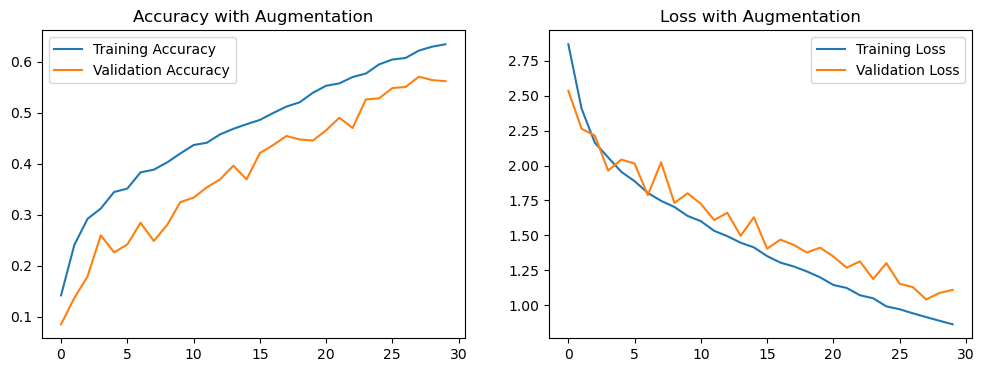

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

# Apply Augmentation to Training Data
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# Define a New CNN Model with Augmentation
model_augmented = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')  # Softmax for multi-class classification
])

# Compile the Model with a reduced learning rate
model_augmented.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping and Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model_augmented.keras", save_best_only=True, monitor='val_loss', mode='min')

from sklearn.utils.class_weight import compute_class_weight

# Get class labels for the training dataset
train_labels = []
for _, label in train_dataset_raw.unbatch():
    train_labels.append(label.numpy())

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(train_labels), y=train_labels
)
class_weight_dict = dict(enumerate(class_weights))

# Print class weights to verify
print(f"Class weights: {class_weight_dict}")


# New Code with Class Weights and Augmented Dataset
history_augmented = model_augmented.fit(
    balanced_train_dataset,  # Use the balanced dataset after augmentation
    validation_data=val_dataset,
    epochs=30,
    class_weight=class_weight_dict,  # Apply class weights for imbalance handling
    callbacks=[early_stopping, checkpoint]
)


# Plot Accuracy and Loss Curves for Augmented Model
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy with Augmentation')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss with Augmentation')

plt.show()


## Observation:

### * A custom Convolutional Neural Network (CNN) model was built and trained for 20 epochs. The architecture consisted of four convolutional blocks followed by fully connected layers. The model was trained using the Adam optimizer with a learning rate of 0.0005 and sparse categorical crossentropy as the loss function.

## Analysis:

### * The model was relatively simple, with standard CNN layers and pooling to extract features from the images. The use of a relatively low learning rate of 0.0005 helped ensure that the training process was stable and avoided large updates to the weights, which could destabilize learning. However, with a simpler model and no additional techniques like pre-trained weights or more complex architectures, the model struggled to reach a higher level of performance.

### * Training accuracy improved progressively and reached 60.1% by the end of the 20 epochs. This indicates that the model was able to learn the features from the training dataset but was likely overfitting slightly, as the validation accuracy was slightly lower at 57.05%. The training loss decreased steadily, indicating that the model was learning, but the validation loss showed slower improvement, which is typical of underfitting when a model is too simple or does not have enough capacity to capture complex patterns.

### * Class Imbalance Handling: The model did not employ any specific methods for handling class imbalances during this step, which might explain the relatively poor performance on underrepresented classes like melanoma. The model may have been biased toward classes with more samples, making it harder to classify rare diseases accurately.

### * The small gap between training and validation accuracy suggests that overfitting was minimal, which is a good sign. However, the relatively low performance on the validation set and the fact that the validation accuracy plateaued early (around Epoch 16) suggests that the model may benefit from more complexity or techniques like data augmentation, class weighting, or a more sophisticated architecture (e.g., using pre-trained models).

### * Learning Rate Behavior: The learning rate appeared stable throughout the training process. The model's steady progress suggests that the chosen learning rate was appropriate for this task. However, a lower learning rate or a learning rate scheduler might be beneficial for further refinements.



# Step 9: Model Evaluation and Results

Found 118 files belonging to 9 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.3757 - loss: 2.2336
Final Test Loss: 2.1225
Final Test Accuracy: 0.3898
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Classification Report:
                            precision    recall  f1-score   support

         actinic keratosis       0.08      0.06      0.07        16
      basal cell carcinoma       0.29      0.12      0.17        16
            dermatofibroma       0.25      0.19      0.21        16
                  melanoma       0.50      0.06      0.11        16
                     nevus       0.15      0.38      0.22        16
pigmented benign keratosis       0.18      0.19      0.18        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.19      0.25      0.22        16
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.17       118
                 macro av

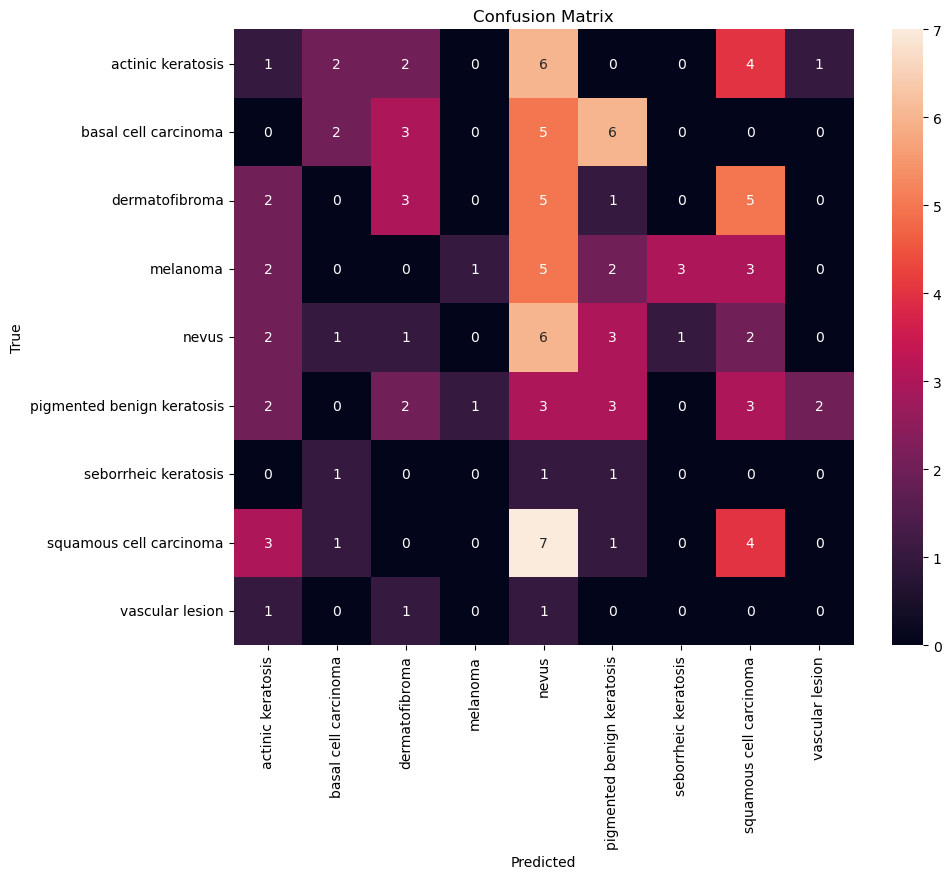

In [11]:
# Load and preprocess the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    image_size=img_size,
    batch_size=batch_size
)
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Evaluate the final model on the test data
test_loss, test_acc = model_augmented.evaluate(test_dataset)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions and true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = np.argmax(model_augmented.predict(test_dataset), axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Observation:
### * The model was evaluated on the test dataset, yielding a test accuracy of 38.98%. While this is lower than the training accuracy, it still provides some insight into how the model is performing on unseen data.
### * A classification report and confusion matrix were generated, highlighting the model’s performance across each class.
### * Poor performance was observed on most classes, with notable misclassifications in the melanoma and seborrheic keratosis categories.


## Analysis:

### * Test Accuracy of 38.98%:
#### * The model's test accuracy of 38.98% suggests that it struggles to generalize to new, unseen data, even though the training accuracy was considerably higher. This significant performance drop could be due to several factors, including overfitting, inadequate handling of class imbalances, or insufficient model complexity.
#### * Overfitting is a potential cause, where the model fits the training data well but fails to generalize on test data. The small gap between training and validation accuracy earlier in the training process suggests overfitting could have been minimized to some extent, but it still likely exists.
#### * The accuracy also reveals that the model is not effectively identifying the patterns required to correctly classify skin diseases, especially melanoma, which is critical in this context.

### * Confusion Matrix Insights:
#### * The confusion matrix revealed significant misclassifications across several classes, with some classes, such as melanoma and seborrheic keratosis, being particularly difficult for the model to classify.
#### * Misclassifications of melanoma are especially concerning, as this category is of primary interest in skin cancer detection. This indicates that the model is failing to detect melanoma properly, which could be due to insufficient features being captured by the model, the need for more advanced architecture, or difficulties with class imbalance.
#### * The matrix also reveals patterns where certain classes like vascular lesions, seborrheic keratosis, and actinic keratosis were heavily misclassified, indicating that the model might be biased towards classes with more samples and is neglecting others.

### * Precision, Recall, and F1-Score:
#### * Precision, recall, and F1-score metrics from the classification report showed lower values, especially for minority classes, which often occurs when dealing with imbalanced datasets. The model struggled with precision and recall for several classes, indicating that it was either predicting too many false positives (low precision) or failing to capture enough true positives (low recall) for those classes.
#### * The F1-score being low for multiple classes shows that the model's balance between precision and recall is suboptimal. Improving these metrics would require addressing the imbalances, enhancing feature extraction, and tuning the model further.

### * Generalization Issues:

#### * The poor test performance and misclassifications point to generalization issues. The model likely lacks the ability to differentiate between classes effectively, especially the rare or complex ones like melanoma.
#### * The model’s inability to properly detect melanoma may stem from limited data for certain classes and the lack of sufficiently varied and complex features being learned by the model.

# CONCLUSION

## Observation:
### * Despite some improvements from the initial training, the model's final performance on the test set highlights several challenges, such as misclassification of critical classes (especially melanoma) and overall low accuracy.
### * The model seems underperforming, and additional strategies are needed to improve its generalization capability.


## Analysis:

### * Limited Performance Improvement:
#### * The low test accuracy indicates that, while the model has learned some features from the training data, it hasn’t reached the level needed for accurate melanoma detection. The underperformance on key classes indicates that simply using a basic CNN architecture is insufficient for the complexities of this task.

### * Class Imbalance:
#### * The class imbalance remains a critical issue. Despite efforts to augment the dataset, the model continues to favor the more frequent classes. Without addressing this imbalance effectively (e.g., through oversampling or class-weight adjustments), the model will continue to underperform on minority classes like melanoma.

### * Model Complexity:
#### * The architecture used in this model may be too simple to handle the complexity of the problem. Deeper models, potentially using pre-trained architectures such as ResNet, EfficientNet, or InceptionV3, would likely improve performance. These models can capture more intricate patterns and better generalize across the data, especially when fine-tuned for specific tasks like melanoma detection.

### * Feature Extraction:
#### * The model likely lacks the ability to extract enough meaningful features to differentiate between the subtle nuances of different types of skin diseases. Utilizing pre-trained models could address this issue by leveraging the wealth of learned features from large datasets such as ImageNet.

# Final Thoughts:
### The model's current state is promising in terms of establishing a baseline but falls short in the most critical areas, such as detecting melanoma. The need for more advanced techniques, better data handling, and potentially a more powerful model architecture is clear. Moving forward, applying more sophisticated architectures and handling data imbalances more effectively will likely improve model accuracy and robustness in real-world applications of melanoma detection.